In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [263]:
train = pd.read_csv(r'C:\Users\198353\Downloads\SMS_spam\spam.csv',encoding="ISO-8859-1")

In [264]:
train.shape

(5572, 5)

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [266]:
train.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [267]:
train.fillna('',inplace = True)
train['sms'] = train['v2'] + train['Unnamed: 2'] + train['Unnamed: 3'] + train['Unnamed: 4']

In [268]:
def drop_features (features, data):
    train.drop(features,inplace = True,axis = 1)

In [269]:
drop_features(['v2','Unnamed: 2','Unnamed: 3','Unnamed: 4'],train)

In [270]:
train.head()

,v1,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [271]:
train['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

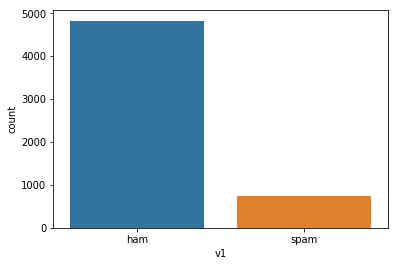

In [272]:
sns.countplot(train['v1'])

In [273]:
#getting the description of the data
train.groupby('v1').describe()

sms                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [274]:
train['label'] = train.v1.map({'ham':0,'spam': 1})

In [275]:
drop_features(['v1'],train)

In [276]:
train.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [277]:
train['length'] = train['sms'].apply(len)
train.head()

,sms,label,length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A0DF62E0F0>,
      dtype=object)

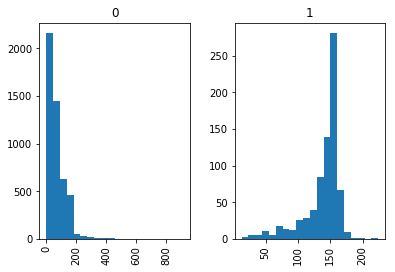

In [278]:
#IMPORTANT plot for categorisation
train.hist(column = 'length', by = 'label', bins = 20)

In [279]:
train['sms'] = train['sms'].str.lower()

In [280]:
train['sms'] = train['sms'].str.strip() #removes extra spaces

In [281]:
train['sms'] = train['sms'].str.replace('[^\w\s]','') #Remove punctuations

In [282]:
freq = pd.Series(' '.join(train['sms']).split()).value_counts()[:10]  #frequencies of words in the messages
freq
#freq.plot.bar(legend = False)

#freq = list(freq.index)
#train['sms'] = train['sms'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#train['sms'].head()

to     2251
i      2238
you    2128
a      1441
the    1333
u      1132
and     971
is      893
in      888
me      791
dtype: int64

In [283]:
train.head()

,sms,label,length
0,go until jurong point crazy available only in ...,0,111
1,ok lar joking wif u oni,0,29
2,free entry in 2 a wkly comp to win fa cup fina...,1,155
3,u dun say so early hor u c already then say,0,49
4,nah i dont think he goes to usf he lives aroun...,0,61


In [284]:
#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#train['sms'] = train['sms'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [285]:
from nltk.stem import SnowballStemmer
st = SnowballStemmer("english")
train['sms'] = train['sms'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

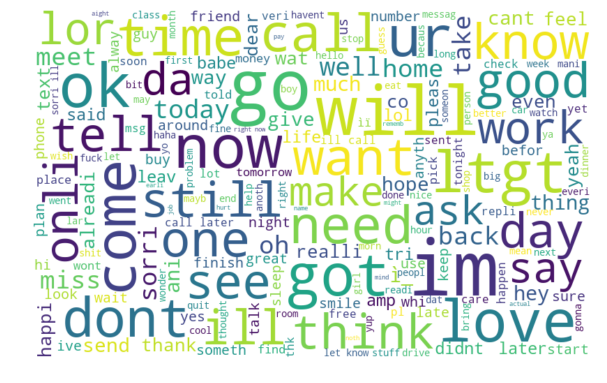

In [286]:
from wordcloud import WordCloud
#ham word cloud
ham_words =' '.join([text for text in train['sms'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, background_color ='white', max_font_size=110).generate(ham_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


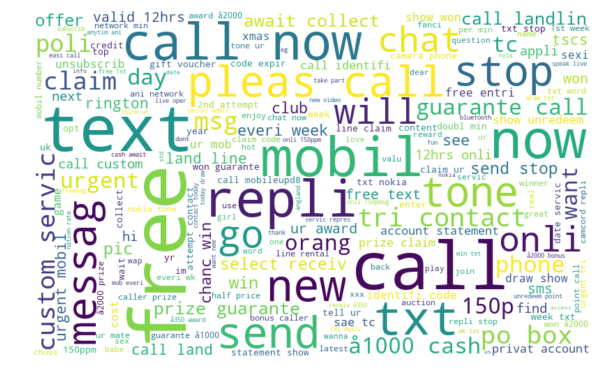

In [287]:
spam_words =' '.join([text for text in train['sms'][train['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, background_color ='white', max_font_size=110).generate(spam_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [288]:
#from textblob import TextBlob
#train['sms'].apply(lambda x: str(TextBlob(x).correct()))

In [289]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train['sms'],train['label'],test_size = 0.2, random_state = 10)
print (xtrain.shape)
print (xtest.shape)
print (ytrain.shape)
print (ytest.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [290]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
#Using countvectoriser to count the freq of occurence of each word

#CountVectorizer can lowercase letters, disregard punctuation and stopwords, but it can't LEMMATIZE or STEM

count_vect = CountVectorizer() #Transforms the data into a bag of words
xtrain_count = count_vect.fit_transform(xtrain)
xtrain_count.shape 

(4457, 7325)

In [291]:
print(count_vect.get_feature_names()[0:20])
print(count_vect.get_feature_names()[-20:])

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104']
['å6', 'å600', 'å71', 'å750', 'å75000', 'å800', 'å900', 'åð', 'åòharri', 'åòit', 'åômorrow', 'åôrent', 'ì_', 'ì_ll', 'ìï', 'û_', 'û_thank', 'ûï', 'ûïharri', 'ûò']


In [292]:
#Using tf-idf to reduce the effect of common words (TF-IDF - Maximum token value throughout the whole dataset)

#tf(t) = the term frequency is the number of times the term appears in the document
#idf(d,t) = the document frequency is the number of documents 'd' that contain term 't'

#Summary: the more times a token appears in a document, the more weight it will have. 
#However, the more documents the token appears in, it is 'penalized' and the weight is diminished.

tf_transformer = TfidfTransformer(use_idf=False)
xtrain_tf = tf_transformer.fit_transform(xtrain_count )
xtrain_tf.shape

(4457, 7325)

In [293]:
xtest_count = count_vect.transform(xtest)
xtest_count.shape

(1115, 7325)

In [294]:
xtest_tf = tf_transformer.transform(xtest_count)
xtest_tf.shape

(1115, 7325)

In [295]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain_tf,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [296]:
prediction = dict() 
prediction['Logistic'] = model.predict(xtest_tf)

In [297]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
accuracy_score(ytest,prediction['Logistic'])

0.967713004484305

In [298]:
confusion_matrix(ytest,prediction['Logistic'])

array([[961,   4],
       [ 32, 118]], dtype=int64)

In [299]:
print("f1 score -> ", f1_score(ytest,prediction['Logistic']))

f1 score ->  0.8676470588235293


In [300]:
#Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(xtrain_tf,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [301]:
prediction['Multinomial'] = model2.predict(xtest_tf)
accuracy_score(ytest,prediction['Multinomial'])

0.9336322869955157

In [302]:
confusion_matrix(ytest,prediction['Multinomial'])

array([[965,   0],
       [ 74,  76]], dtype=int64)

In [303]:
print("f1 score -> ", f1_score(ytest,prediction['Multinomial']))

f1 score ->  0.6725663716814159


In [304]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier (n_neighbors = 5)
model3.fit (xtrain_tf,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [305]:
prediction['knn'] = model3.predict(xtest_tf)
accuracy_score(ytest,prediction['knn'])

0.9201793721973094

In [306]:
confusion_matrix (ytest, prediction['knn'])

array([[965,   0],
       [ 89,  61]], dtype=int64)

In [307]:
print("f1 score -> ", f1_score(ytest,prediction['knn']))

f1 score ->  0.5781990521327014


In [308]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit (xtrain_tf,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [309]:
prediction['random_forest'] = model4.predict(xtest_tf)
accuracy_score(ytest,prediction['random_forest'])

0.9623318385650225

In [310]:
confusion_matrix (ytest, prediction['random_forest'])

array([[965,   0],
       [ 42, 108]], dtype=int64)

In [311]:
print("f1 score -> ", f1_score(ytest,prediction['random_forest']))

f1 score ->  0.8372093023255813


In [312]:
print(classification_report(ytest, prediction['random_forest'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.96      1.00      0.98       965
       Spam       1.00      0.72      0.84       150

avg / total       0.96      0.96      0.96      1115



In [313]:
#row misclassified as spam
xtest[ytest < prediction['random_forest'] ]

Series([], Name: sms, dtype: object)

In [314]:
#row misclassified as ham
xtest[ytest > prediction['random_forest'] ]

5035    you wont believ it but it true it incred txts ...
1153    1000s of girl mani local 2 u who r virgin 2 th...
2574    your next amaz xxx picsfree1 video will be sen...
4614    sunshin quiz win a super soni dvd record if yo...
1838    hack chat get backdoor entri into 121 chat roo...
1455    summer final here fanci a chat or flirt with s...
3130    lookatm thank for your purchas of a video clip...
2294         you have 1 new messag pleas call 08718738034
3554    from next month get upto 50 more call 4 ur sta...
1506    thank for the vote now sing along with the sta...
146     freemsg whi havent you repli to my text im ran...
4071    loan for ani purpos even if you have bad credi...
1327    ur balanc is now å500 ur next question is who ...
2939         you have 1 new messag pleas call 08712400200
164     bangbab ur order is on the way u should receiv...
414         100 date servic call 09064012103 box334sk38ch
814     u were outbid by simonwatson5120 on the shinco...
4525    i want